# METRICS COMPARISONS

## lPCA 

To perform PCA we used lPCA metric from scikit dimension (also implemented as ID estimator in our package).

In [ ]:
from md_intrinsic_dimension import intrinsic_dimension
from moleculekit.molecule import Molecule
import moleculekit.projections.metricrmsd as metricrmsd
from itertools import product
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

colors = mpl.colors.ListedColormap(
    name="discrete-bicolor",
    colors=["#e9ff99","#ceff29", "#A5CC21", "#C099F3", "#6100e0", "#4E00B3"])

plt.rcParams.update({
	'axes.titlesize': 13,
	'axes.labelsize': 13,
	'xtick.labelsize': 11,
	'ytick.labelsize': 11,
	'legend.fontsize': 11,
	'legend.title_fontsize': 13,
	'lines.linewidth' : 1,
	'lines.markersize': 8,
})

### Villin

2025-12-02 15:37:50,083 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-12-02 15:37:50,100 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 577 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
2025-12-02 15:37:52,451 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-12-02 15:37:52,468 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 577 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrappin

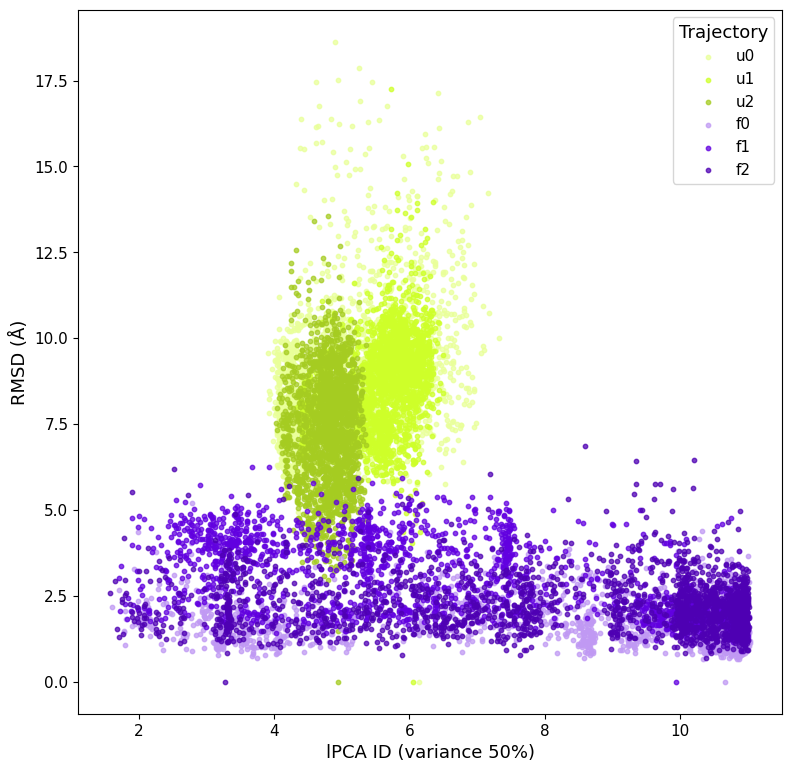

In [3]:
#lpca 
topology='examples/villin/2f4k.pdb'
trajectory='examples/villin/2f4k'


data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
estimators = ['lPCA']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3} 
ref = Molecule(topology)

for estimator, state in product(estimators, states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology=topology, 
                                                        trajectory=trajectory+f'_{state}.xtc',
                                                        projection_method=projection_method, 
                                                        projection_kwargs = projection_kwargs,
                                                        id_method='local',
                                                        id_kwargs={'estimator': estimator, 'ver' :'ratio', 'alphaRatio':0.50},  #specificare anche il numero di vicini?
                                                        verbose=False
                                                        )
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=metricrmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)
	
    data.append({'trajectory': state,
	  'estimator': estimator,
	  'mean_all': mean_all,
	  'mean_last': mean_last,
      'local_id': local_id,
	  'rmsd': rmsd_values})
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


###### plotting ########
fig1, ax1 = plt.subplots(figsize=(8,8))

states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    local_id_array = np.concatenate(subset['local_id'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax1.scatter(local_id_array,
                 rmsd_array,
                 color=colors.colors[i], 
                 alpha=0.75, 
                 label=s, 
                 s=10
                 )
ax1.set_box_aspect(1)
plt.xlabel('lPCA ID (variance 50%)')
plt.ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
plt.savefig(f'../extra/villin_lpca_50_rmsd_{projection_method}.pdf', dpi = 300)
plt.show()

### NTL9

2025-12-01 14:56:02,840 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-12-01 14:56:02,872 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 624 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
2025-12-01 14:56:08,266 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-12-01 14:56:08,312 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 624 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrappin

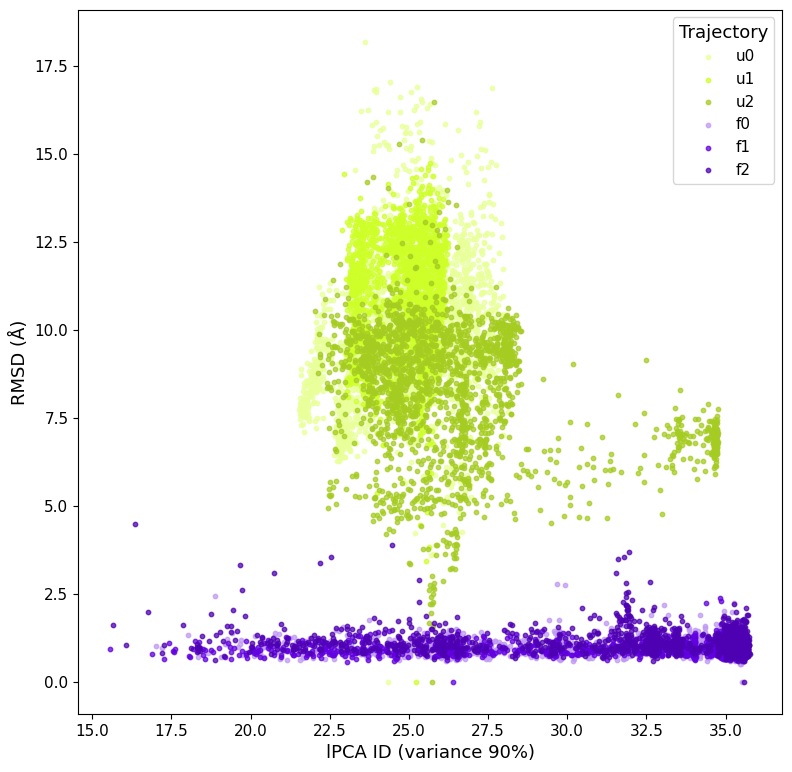

In [7]:
#lpca 
topology='examples/NTL9/ntl9.pdb'
trajectory='examples/NTL9/ntl9'
protein = 'ntl9'

data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
estimators = ['lPCA']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3} 
ref = Molecule(topology)

for estimator, state in product(estimators, states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology=topology, 
                                                        trajectory=trajectory+f'_{state}.xtc',
                                                        projection_method=projection_method, 
                                                        projection_kwargs = projection_kwargs,
                                                        id_method='local',
                                                        id_kwargs={'estimator': estimator, 'ver' :'ratio', 'alphaRatio':0.90,  n_neighbors=100}, 
                                                        verbose=False
                                                        )
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=metricrmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)
	
    data.append({'trajectory': state,
	  'estimator': estimator,
	  'mean_all': mean_all,
	  'mean_last': mean_last,
      'local_id': local_id,
	  'rmsd': rmsd_values})
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


###### plotting ########
fig1, ax1 = plt.subplots(figsize=(8,8))

states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    local_id_array = np.concatenate(subset['local_id'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax1.scatter(local_id_array,
                 rmsd_array,
                 color=colors.colors[i], 
                 alpha=0.75, 
                 label=s, 
                 s=10
                 )
ax1.set_box_aspect(1)
plt.xlabel('lPCA ID (variance 90%)')
plt.ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
plt.savefig(f'../extra/ntl9_lpca_rmsd_{projection_method}.pdf', dpi = 300)
plt.show()

### TICA

**WARNING** this part of the notebook requires htmd package, which relies on a conda environment. 
It can be installed following [this link](https://software.acellera.com/htmd/installation.html).

In [2]:
from moleculekit.molecule import Molecule
from moleculekit.projections.projection import Projection
from moleculekit.projections.metricdihedral import MetricDihedral, Dihedral
from htmd.projections.tica import TICA 
from htmd.projections.metric import Metric
from htmd.simlist import simlist
from htmd.simlist import Sim
from htmd.metricdata import MetricData
from itertools import product
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

colors = mpl.colors.ListedColormap(
    name="discrete-bicolor",
    colors=["#e9ff99","#ceff29", "#A5CC21", "#C099F3", "#6100e0", "#4E00B3"])

plt.rcParams.update({
	'axes.titlesize': 13,
	'axes.labelsize': 13,
	'xtick.labelsize': 11,
	'ytick.labelsize': 11,
	'legend.fontsize': 11,
	'legend.title_fontsize': 13,
	'lines.linewidth' : 1,
	'lines.markersize': 8,
})

2025-12-11 11:17:11,715 - numexpr.utils - INFO - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
2025-12-11 11:17:11,717 - numexpr.utils - INFO - NumExpr defaulting to 16 threads.


### Villin

2025-12-02 11:21:40,053 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-12-02 11:21:40,073 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 577 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]
2025-12-02 11:21:40,460 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
2025-12-02 11:21:40,701 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the fram

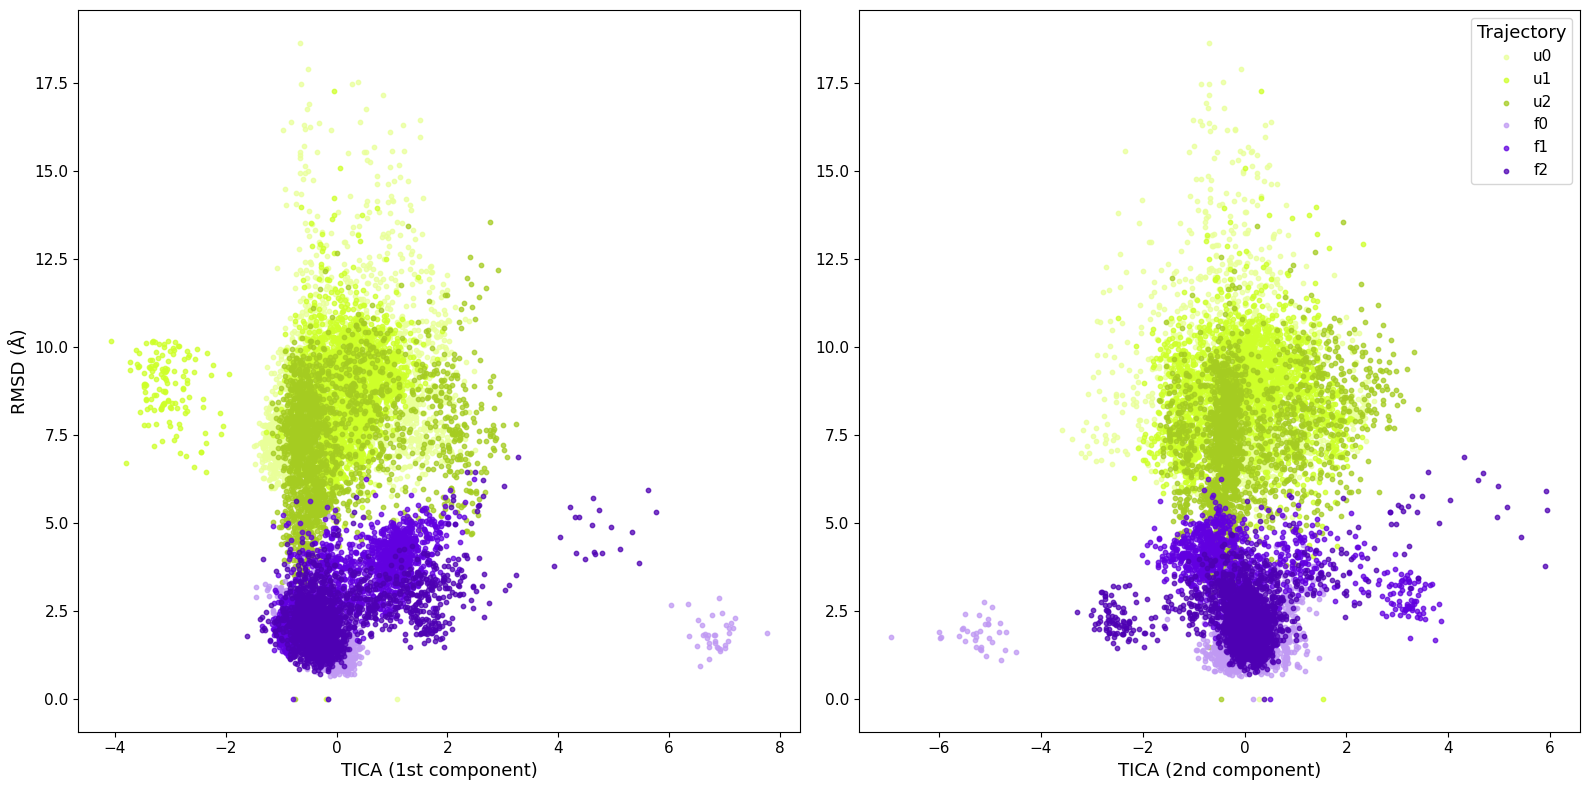

In [3]:
#tica
topology='examples/villin/2f4k.pdb'
trajectory='examples/villin/2f4k'


data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
estimators = ['lPCA']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3} 
ref = Molecule(topology)

lagtime = 1

for estimator, state in product(estimators, states):
    #rmsd
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=metricrmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)

    #tica
    sim = Sim(trajectory+f'_{state}.xtc', topology)
    sims = [sim]
    metr = Metric(sims)
    #compute projections with moleculekit
    angles = Dihedral.proteinDihedrals(mol=mol, sel = 'protein', dih = ('psi','phi'))
    metr.set(MetricDihedral(dih = angles, sincos =False, protsel = 'all')) 
    metr_data = metr.project()
    #metr_data.fstep = 1
    tica = TICA(data = metr_data,lag=lagtime)
    datatica = tica.project(2)
    projection1 = datatica.dat[0][:,0]
    projection2 = datatica.dat[0][:,1]
    
    data.append({'trajectory': state,
                 'estimator': estimator,
                 'tica1' : projection1,
                 'tica2' : projection2,
                 'rmsd': rmsd_values
                })
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


###### plotting ########
fig, ax = plt.subplots(figsize=(16,8), ncols = 2)

states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    tica1_array = np.concatenate(subset['tica1'].values)
    tica2_array = np.concatenate(subset['tica2'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax[0].scatter(tica1_array,rmsd_array,color=colors.colors[i], alpha=0.75, label=s, s=10)
    ax[1].scatter(tica2_array,rmsd_array,color=colors.colors[i], alpha=0.75, label=s, s=10)
ax[0].set_box_aspect(1)
ax[0].set_xlabel('TICA (1st component)')
ax[1].set_xlabel('TICA (2nd component)')
ax[0].set_ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
plt.savefig(f'../extra/villin_tica_{lagtime}_{projection_method}.pdf', dpi = 300)
plt.show()

Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.08it/s]
2025-12-11 11:21:37,621 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.04it/s]
2025-12-11 11:21:37,986 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.12it/s]
2025-12-11 11:21:38,353 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.20it/s]
2025-12-11 11:21:38,717 - htmd.projectio

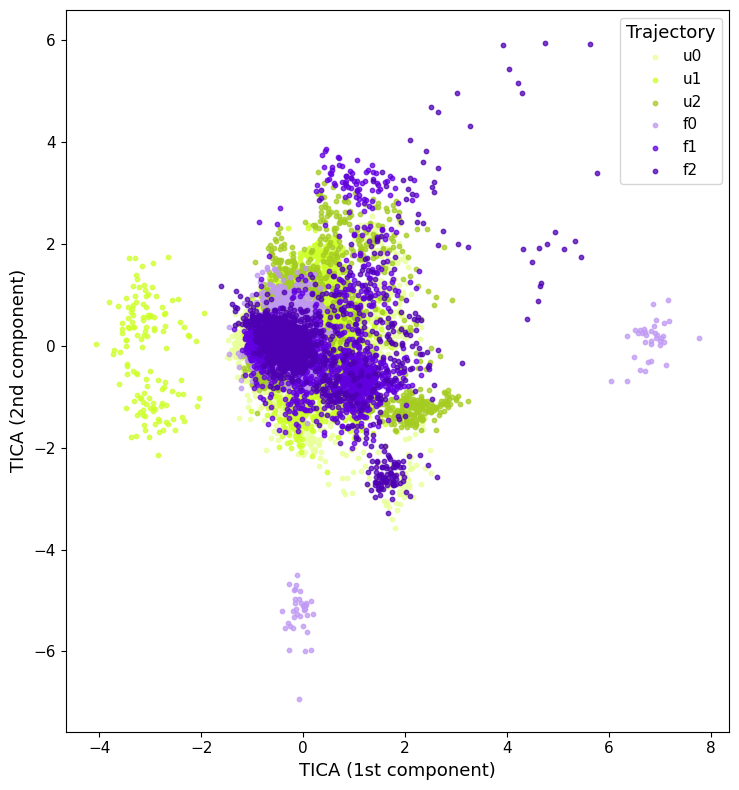

In [7]:
#tica
topology='examples/villin/2f4k.pdb'
trajectory='examples/villin/2f4k'


data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
estimators = ['lPCA']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3} 
ref = Molecule(topology)

lagtime = 1

for estimator, state in product(estimators, states):
    #tica
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    sim = Sim(trajectory+f'_{state}.xtc', topology)
    sims = [sim]
    metr = Metric(sims)
    #compute projections with moleculekit
    angles = Dihedral.proteinDihedrals(mol=mol, sel = 'protein', dih = ('psi','phi'))
    metr.set(MetricDihedral(dih = angles, sincos =False, protsel = 'all')) 
    metr_data = metr.project()
    #metr_data.fstep = 1
    tica = TICA(data = metr_data,lag=lagtime)
    datatica = tica.project(2)
    projection1 = datatica.dat[0][:,0]
    projection2 = datatica.dat[0][:,1]
    
    
    data.append({'trajectory': state,
                 'estimator': estimator,
                 'tica1' : projection1,
                 'tica2' : projection2,
                 })
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")

fig, ax = plt.subplots(figsize=(16,8))

states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
for i, s in enumerate(states):
        subset = data[data['trajectory'] == s]
        tica1_array = np.concatenate(subset['tica1'].values)
        tica2_array = np.concatenate(subset['tica2'].values)
        plt.scatter(tica1_array,tica2_array,color=colors.colors[i], alpha=0.75, label=s, s=10)
ax.set_aspect('equal')
ax.set_xlabel('TICA (1st component)')
ax.set_ylabel('TICA (2nd component)')

plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
#plt.savefig(f'../extra/villin_tica_{lagtime}_{projection_method}.pdf', dpi = 300)
plt.show()


In [24]:
data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2']
estimators = ['lPCA']
lagtime = 1

metr_datas = []     
for estimator, state in product(estimators, states):
    mol = ref
    mol.read(trajectory + f'_{state}.xtc')
    sim = Sim(trajectory + f'_{state}.xtc', topology)
    sims = [sim]
    metr = Metric(sims)

    angles = Dihedral.proteinDihedrals(mol=mol, sel='protein', dih=('psi', 'phi'))
    metr.set(MetricDihedral(dih=angles, sincos=False, protsel='all'))
    metr_data = metr.project()

    metr_datas.append(metr_data)


combined_features = np.vstack([md.dat[0] for md in metr_datas])  # stack all features vertically
print(combined_features)
combined = MetricData()
combined._data = [combined_features]
combined.fstep = metr_datas[0].fstep

# Run TICA once on the combined data
tica = TICA(data=combined, lag=lagtime)
tica_proj = tica.project(2)

split_tica = []
start = 0
for L in traj_lengths:
    split_tica.append(tica_proj[start:start+L])
    start += L

# ---- BUILD FINAL DATAFRAME (format identical to your original one) ----

data = []
for estimator in estimators:
    for state, Xt in zip(states, split_tica):
        data.append({
            "trajectory": state,
            "estimator": estimator,
            "tica1": Xt[:, 0],
            "tica2": Xt[:, 1],
        })

data = pd.DataFrame(data)


Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.71it/s]
2025-12-11 12:03:26,055 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.66it/s]
2025-12-11 12:03:26,259 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.41it/s]
2025-12-11 12:03:26,548 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 11.25it/s]
2025-12-11 12:03:26,762 - htmd.projectio

[[-125.07822   -75.022995  155.33655  ...  -96.67657   -34.126198
   -68.36481 ]
 [ 148.78299   -75.56014   133.09726  ...  -73.65261   -12.252488
   -91.073135]
 [ 107.128586  -70.638     131.66086  ... -124.304436  -58.87573
  -114.40564 ]
 ...
 [ 131.39934   -88.37014  -179.99232  ...  -68.59553    13.466085
   -99.21045 ]
 [ 133.49156  -102.12351   176.57228  ...  -78.821144  -10.300883
  -127.57017 ]
 [ 123.24415   -89.589165 -177.12672  ... -128.62006    -9.255343
   -84.18247 ]]


AssertionError: Data is empty.

### NTL9

2025-12-02 11:22:37,559 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-12-02 11:22:37,580 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 624 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
Projecting trajectories: 100%|███████████████████████████████████| 1/1 [00:00<00:00,  9.21it/s]
2025-12-02 11:22:38,011 - htmd.projections.metric - INFO - Frame step 0.001ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
2025-12-02 11:22:38,310 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the fram

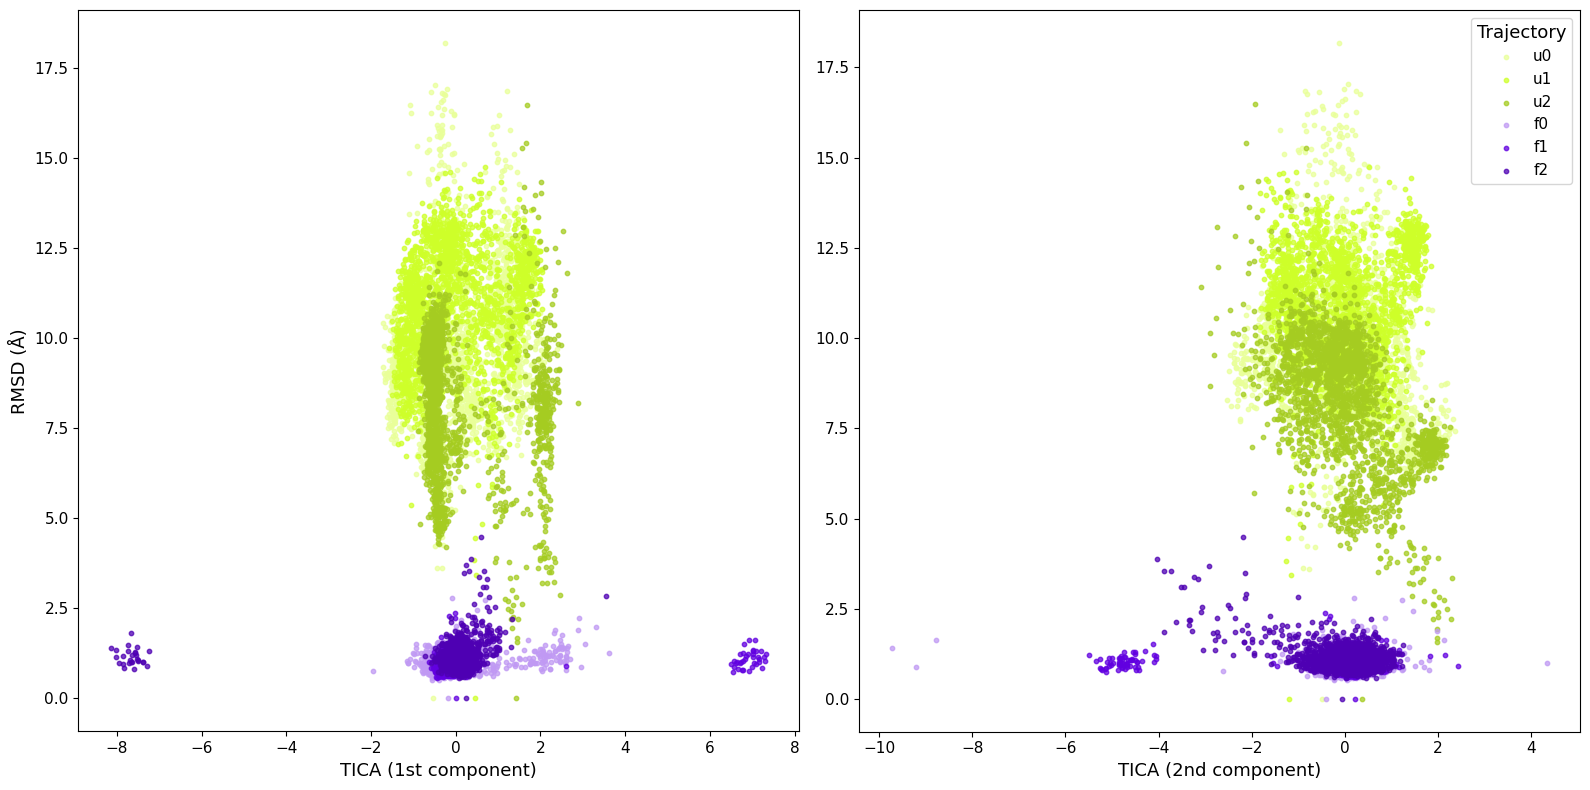

In [4]:
#tica
topology='examples/NTL9/ntl9.pdb'
trajectory='examples/NTL9/ntl9'
protein = 'ntl9'

data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
estimators = ['lPCA']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3} 
ref = Molecule(topology)

lagtime = 1

for estimator, state in product(estimators, states):
    #rmsd
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=metricrmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)

    #tica
    sim = Sim(trajectory+f'_{state}.xtc', topology)
    sims = [sim]
    metr = Metric(sims)
    #compute projections with moleculekit
    angles = Dihedral.proteinDihedrals(mol=mol, sel = 'protein', dih = ('psi','phi'))
    metr.set(MetricDihedral(dih = angles, sincos =False, protsel = 'all')) 
    metr_data = metr.project()
    #metr_data.fstep = 1
    tica = TICA(data = metr_data,lag=lagtime)
    datatica = tica.project(2)
    projection1 = datatica.dat[0][:,0]
    projection2 = datatica.dat[0][:,1]
    
    data.append({'trajectory': state,
                 'estimator': estimator,
                 'tica1' : projection1,
                 'tica2' : projection2,
                 'rmsd': rmsd_values
                })
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


###### plotting ########
fig, ax = plt.subplots(figsize=(16,8), ncols = 2)

states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    tica1_array = np.concatenate(subset['tica1'].values)
    tica2_array = np.concatenate(subset['tica2'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax[0].scatter(tica1_array,rmsd_array,color=colors.colors[i], alpha=0.75, label=s, s=10)
    ax[1].scatter(tica2_array,rmsd_array,color=colors.colors[i], alpha=0.75, label=s, s=10)
ax[0].set_box_aspect(1)
ax[0].set_xlabel('TICA (1st component)')
ax[1].set_xlabel('TICA (2nd component)')
ax[0].set_ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
plt.savefig(f'../extra/ntl9_tica_{lagtime}_{projection_method}.pdf', dpi = 300)
plt.show()